In [99]:
import numpy as np
import pandas as pd
import tensorflow as tf

import seaborn as sns

from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [100]:
customer_df= pd.read_csv('../../data/Churn_Modelling.csv')
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [101]:
customer_df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [102]:
for column in customer_df.columns:
    print(customer_df[column].isnull().sum())    

0
0
0
0
0
0
0
0
0
0
0
0
0
0


<AxesSubplot:xlabel='Exited', ylabel='count'>

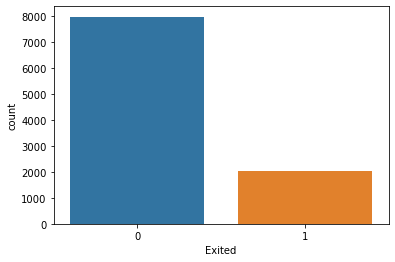

In [103]:
sns.countplot(data=customer_df, x='Exited')

<AxesSubplot:xlabel='Geography', ylabel='count'>

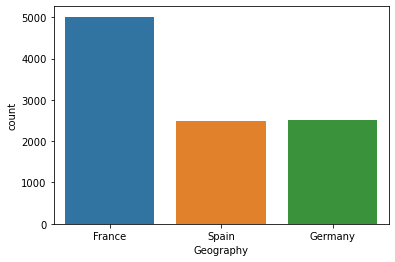

In [104]:
sns.countplot(data=customer_df, x='Geography')

<AxesSubplot:xlabel='Gender', ylabel='count'>

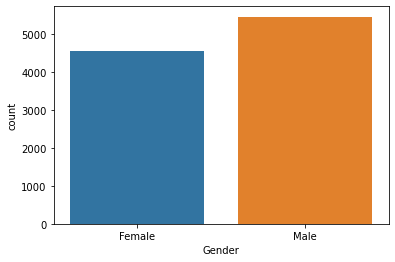

In [105]:
sns.countplot(data=customer_df, x='Gender')

<AxesSubplot:xlabel='Age'>

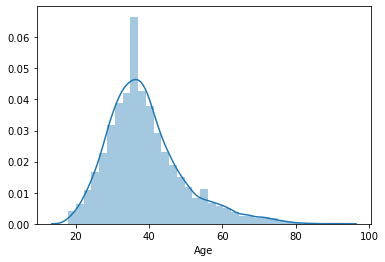

In [106]:
sns.distplot(customer_df['Age'], bins=35)

<AxesSubplot:xlabel='Gender', ylabel='EstimatedSalary'>

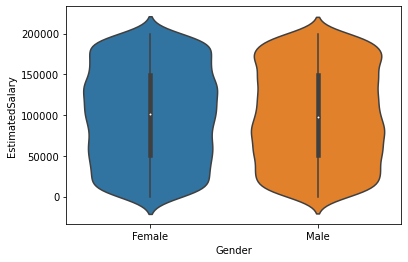

In [107]:
sns.violinplot(x="Gender", y="EstimatedSalary", data=customer_df)

In [108]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [109]:
X = customer_df.iloc[:,3:13].values
y = customer_df['Exited'].values

# Code the gender column
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:,2])

# Code the geography column
ct = ColumnTransformer(transformers=[('geo_encoder', OneHotEncoder(),[1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

# Split the data prior to scal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardze the data
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [110]:
# Build the ANN
ann = tf.keras.models.Sequential()

ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

# Model Fitting
ann.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann.fit(X_train, y_train, batch_size=32, epochs=100, verbose=0)

In [111]:
# Create predictions from the test set
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 0]
 [0 0]
 ...
 [1 1]
 [0 1]
 [0 1]]


In [112]:
"""
Predict this customer
Geography: France
Credit Score: 600
Gender: Male
Age: 40 years old
Tenure: 3 years
Balance: $ 60000
Number of Products: 2
Does this customer have a credit card? Yes
Is this customer an Active Member: Yes
Estimated Salary: $ 50000
So, should we say goodbye to that customer?
"""
print(ann.predict(sc.transform([[1, 0, 0, 600, 1, 40, 3, 60000, 2, 1, 1, 50000]])) > 0.5)

[[False]]


In [113]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.45      0.56       393

    accuracy                           0.86      2000
   macro avg       0.80      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000

